<a href="https://colab.research.google.com/github/Wezz-git/AI-samples/blob/main/(LSTM_RNN)_Forecasting_for_Microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the entire LSTM workflow again, this time on Microsoft ($MSFT), to solidify the pattern.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as no

# 1 - Get tghe data of microsoft (the ticker)
ticker_symbol = "MSFT"
data = yf.download(ticker_symbol, period="max")

print(data.tail())
print(data.info())

/tmp/ipython-input-2225398699.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, period="max")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2025-11-07  496.820007  499.380005  493.250000  496.950012  24019800
2025-11-10  506.000000  506.850006  498.799988  500.040009  26101500
2025-11-11  508.679993  509.600006  502.350006  504.799988  17980000
2025-11-12  511.140015  511.670013  499.119995  509.359985  26574900
2025-11-13  503.290009  513.500000  501.290009  510.309998  25222824
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9997 entries, 1986-03-13 to 2025-11-13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   9997 non-null   float64
 1   (High, MSFT)    9997 non-null   float64
 2   (Low, MSFT)     9997 non-null   float64
 3   (Open, MSFT)    9997 non-null   float64
 4   (Volume, MSFT)  9997 non-null   int64  
dtypes: f

Isolate and scale the data


In [3]:
from sklearn.preprocessing import MinMaxScaler

# 1 - Isolate the 'close' price
data_to_use = data[['Close']].copy()

# convert data to numpy array
dataset = data_to_use.to_numpy()

# 2 - SCreate and fit the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# 3. Check our work
print("--- Scaled Data (Last 5 Rows) ---")
print(scaled_data[-5:])

--- Scaled Data (Last 5 Rows) ---
[[0.91651519]
 [0.93345198]
 [0.93839648]
 [0.94293515]
 [0.92845213]]


--- Data Prep Complete ---
X_test shape: (1999, 60, 1)
y_test shape: (1999, 1)

Building the LSTM model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the model... (This may take a few minutes)
Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 1.3521e-04
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.0827e-05
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3933e-05
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 9.8665e-06
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2449e-05
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0572e-05
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.0043e-05
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.4732e-06
Epoch 9/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0383e-05
Epoch 10/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4764e-05
Making predictions on the test set...
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Model RMSE (Root Mean Squared Error): $8.11
Plotting the results...


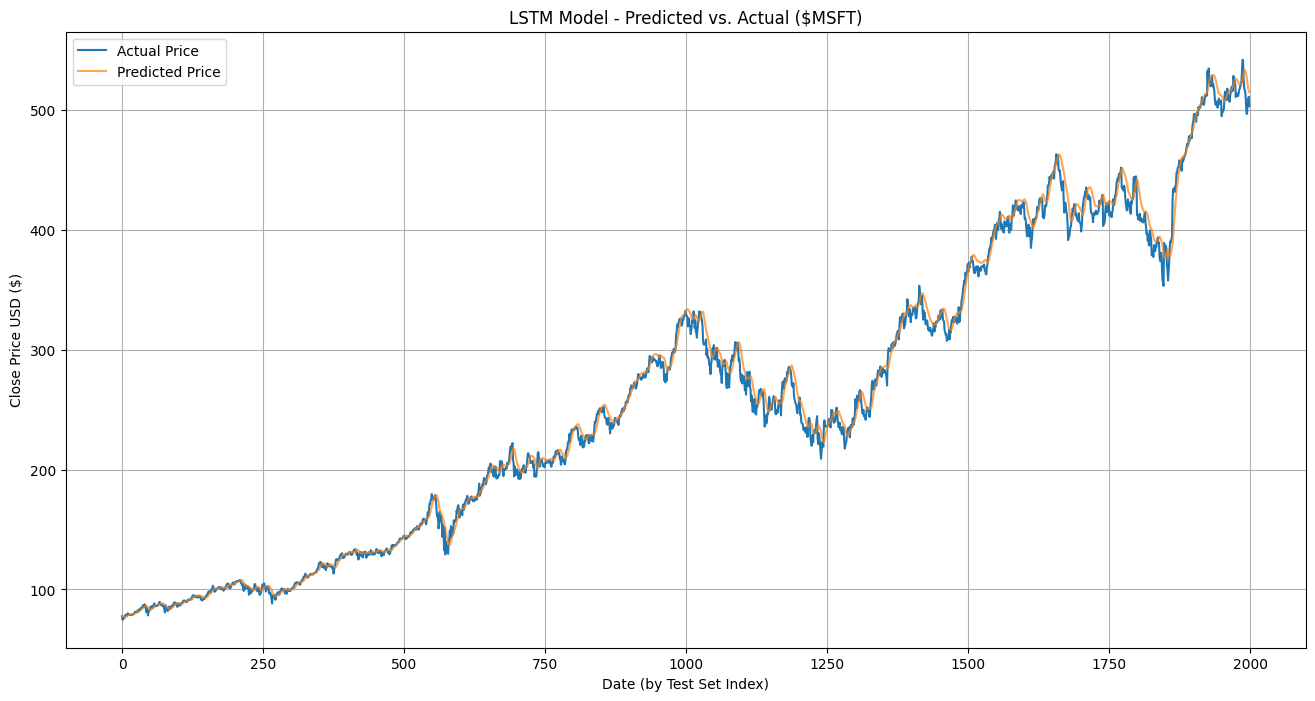

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# (Assuming 'scaled_data', 'dataset', and 'scaler' are in memory)

# 1. DEFINE "WINDOWING" PARAMETERS
lookback_period = 60
training_data_len = int(np.ceil(len(dataset) * .8))

# 2. CREATE THE DATA SLICES
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - lookback_period:, :]

# 3. BUILD THE "WINDOWS" (X_train, y_train)
X_train = []
y_train = []
for i in range(lookback_period, len(train_data)):
    X_train.append(train_data[i-lookback_period:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#  4. BUILD THE "WINDOWS" (X_test, y_test)
X_test = []
y_test = dataset[training_data_len:, :]

for i in range(lookback_period, len(test_data)):
    X_test.append(test_data[i-lookback_period:i, 0])
X_test = np.array(X_test)

# 5. RESHAPE DATA
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"--- Data Prep Complete ---")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}") # This will now be (1999, 1)

# 6. BUILD THE LSTM MODEL
print("\nBuilding the LSTM model...")
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

#  7. TRAIN THE MODEL
print("Training the model... (This may take a few minutes)")
model.fit(X_train, y_train, batch_size=32, epochs=10)

# 8. MAKE PREDICTIONS
print("Making predictions on the test set...")
predictions = model.predict(X_test)

#  9. UN-SCALE & EVALUATE (This will now work)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"\nModel RMSE (Root Mean Squared Error): ${rmse:,.2f}")

# 10. PLOT THE RESULTS
print("Plotting the results...")
actual = pd.DataFrame(y_test, columns=['Actual'])
predicted = pd.DataFrame(predictions, columns=['Predicted'])
plot_df = pd.concat([actual, predicted], axis=1)

plt.figure(figsize=(16,8))
plt.title('LSTM Model - Predicted vs. Actual ($MSFT)')
plt.xlabel('Date (by Test Set Index)')
plt.ylabel('Close Price USD ($)')
plt.plot(plot_df['Actual'], label='Actual Price')
plt.plot(plot_df['Predicted'], label='Predicted Price', alpha=0.7)
plt.legend()
plt.grid()
plt.show()